# Taher Muhammedali - 0478012

## Assignment 1 - Task 1 - Data Science ESM

### (a)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### (b)

In [2]:
fn = "https://tubcloud.tu-berlin.de/s/DbDZ7KCtoRAFpyS/download/wind-speeds.csv"
df = pd.read_csv(fn, index_col=0)

### (c)

In [3]:
# 'U' is speed at hub height
#'Ur' is given speed at reference height
# Zr = 10m - reference height
# Z = 80m - Hub height
# alpha = 0.7 - Given
# Simplified equation - U = Ur * (80/10)^(1/7)
# U = Ur*(8**(1/7))

In [4]:
df['hub_wind_speed'] = df.wind_speed * (8**(1/7))
df

,wind_speed,hub_wind_speed
time,,
2019-01-01 00:00:00,7.885,10.612423
2019-01-01 01:00:00,8.786,11.825079
2019-01-01 02:00:00,9.390,12.638003
2019-01-01 03:00:00,9.768,13.146753
2019-01-01 04:00:00,10.317,13.885652
...,...,...
2019-12-31 19:00:00,6.600,8.882941
2019-12-31 20:00:00,6.097,8.205953
2019-12-31 21:00:00,5.802,7.808913


### (d)

In [5]:
# Writing function for Vestas & Enercon. It takes wind speed at Hub height and returns Power according to the Power curve table

In [6]:
def vestas (wind):
        if wind < 4:
            return 0
        elif wind < 6:
            return 0.2
        elif wind < 8:
            return 0.5
        elif wind < 10:
            return 1.4
        elif wind < 12:
            return 2.6
        elif wind < 25: #cutoff speed
            return 3
        else:
            return 0

In [7]:
def enercon (wind):
        if wind < 4:
            return 0
        elif wind < 6:
            return 0.1
        elif wind < 8:
            return 0.3
        elif wind < 10:
            return 0.8
        elif wind < 12:
            return 1.6
        elif wind < 14:
            return 2.2
        elif wind < 16:
            return 2.7
        elif wind < 28:  #cutoff speed
            return 3
        else:
            return 0

### (e)

In [8]:
# Converting wind speed to power by calling above functions

In [9]:
vestas_windlist = []
for wind in df.hub_wind_speed:
    vestas_windlist.append(vestas(wind))

len(vestas_windlist) # Just checking if all values returned
# vestas_windlist contains all values of power from Vestas function

8760

In [10]:
enercon_windlist = []
for wind in df.hub_wind_speed:
    enercon_windlist.append(enercon(wind))

len(enercon_windlist)
# enercon_windlist contains all values of power from Enercon function

8760

### (f)

In [11]:
# Summing up all Power values to find total power generated and difference between the two turbines

In [12]:
total_vestas = round((sum(vestas_windlist) / 1000),2)
print ("Total Energy for Vestas is", total_vestas, "GW")

Total Energy for Vestas is 10.17 GW


In [13]:
total_enercon = round ((sum(enercon_windlist) / 1000),2)
print ("Total Energy for Enercon is", total_enercon, "GW")

Total Energy for Enercon is 6.35 GW


In [14]:
power_difference = round ((abs(total_vestas - total_enercon)),2)


if total_vestas > total_enercon:
    print("Vestas produces more power than Enercon, margin between them is %s GW, which is %.1f percent" % (power_difference, power_difference/total_vestas*100))
else:
    print("Enercon produces more power than Vestas, margin between them is %s GW, which is %.1f percent" % (power_difference, power_difference/total_enercon*100))
    


Vestas produces more power than Enercon, margin between them is 3.82 GW, which is 37.6 percent


In [15]:
# Using Vestas data from here on for analysis

### (g)

In [16]:
# Normalizing time series with Vestas power capacity

In [17]:
df['Vestas_Power'] = vestas_windlist

In [18]:
df['Vestas_normalised'] = df.Vestas_Power.apply(lambda x: x / 3.0) # 3.0 MW is the nominal rating for Vestas Turbine
df

,wind_speed,hub_wind_speed,Vestas_Power,Vestas_normalised
time,,,,
2019-01-01 00:00:00,7.885,10.612423,2.6,0.866667
2019-01-01 01:00:00,8.786,11.825079,2.6,0.866667
2019-01-01 02:00:00,9.390,12.638003,3.0,1.000000
2019-01-01 03:00:00,9.768,13.146753,3.0,1.000000
2019-01-01 04:00:00,10.317,13.885652,3.0,1.000000
...,...,...,...,...
2019-12-31 19:00:00,6.600,8.882941,1.4,0.466667
2019-12-31 20:00:00,6.097,8.205953,1.4,0.466667
2019-12-31 21:00:00,5.802,7.808913,0.5,0.166667


### (h) 

In [19]:
# Average power capacity factor of Vestas turbine over the year

In [20]:
avg_cap_factor = round(((sum(df.Vestas_Power) / len(df.Vestas_Power))/(df.Vestas_Power.max())),3)
print ("Average annual capacity factor of Vestas turbine is %s" % avg_cap_factor)

Average annual capacity factor of Vestas turbine is 0.387


### (i)

In [21]:
#Percentage of the time Vestas Power = 0

In [22]:
zero_power = round (((sum(df.Vestas_Power == 0) / len(df.Vestas_Power)) * 100),1)
print (zero_power,"% of time the wind turbine produced nothing")

3.2 % of time the wind turbine produced nothing


### (j)

In [23]:
# Percentage of the time Vestas Power = 3.0

In [24]:
full_power = round (((sum(df.Vestas_Power == 3.0) / len(df.Vestas_Power)) * 100),1)
print (full_power,"% of time the wind turbine produced at rated capacity")

6.4 % of time the wind turbine produced at rated capacity


### (k)

In [25]:
# Number of times the wind speed is above 25m/s to shutdown Vestas turbine

In [26]:
len(df[df.hub_wind_speed >= 25])
#From this we can conclude that the Vestas wind turbine does not shutdown because wind speed never exceeds above 25m/s at hub height

0

### (l)

In [27]:
# Plotting the capacity factor (Power produced by Vestas) against Time (throughtout the year)
# Second method is faster, that is why first method is commented out

In [28]:
# Plot processes slowly with this method

# x = df.index
# y = df.Vestas_normalised
# fig, ax = plt.subplots(figsize = (32,8))
# ax.plot(x, y)
# ax.set_xlabel('Time')
# ax.set_ylabel('Capacity Factor')
# ax.set_title('Vestas Power vs Time')

Text(0.5, 1.0, 'Vestas Power vs Time')

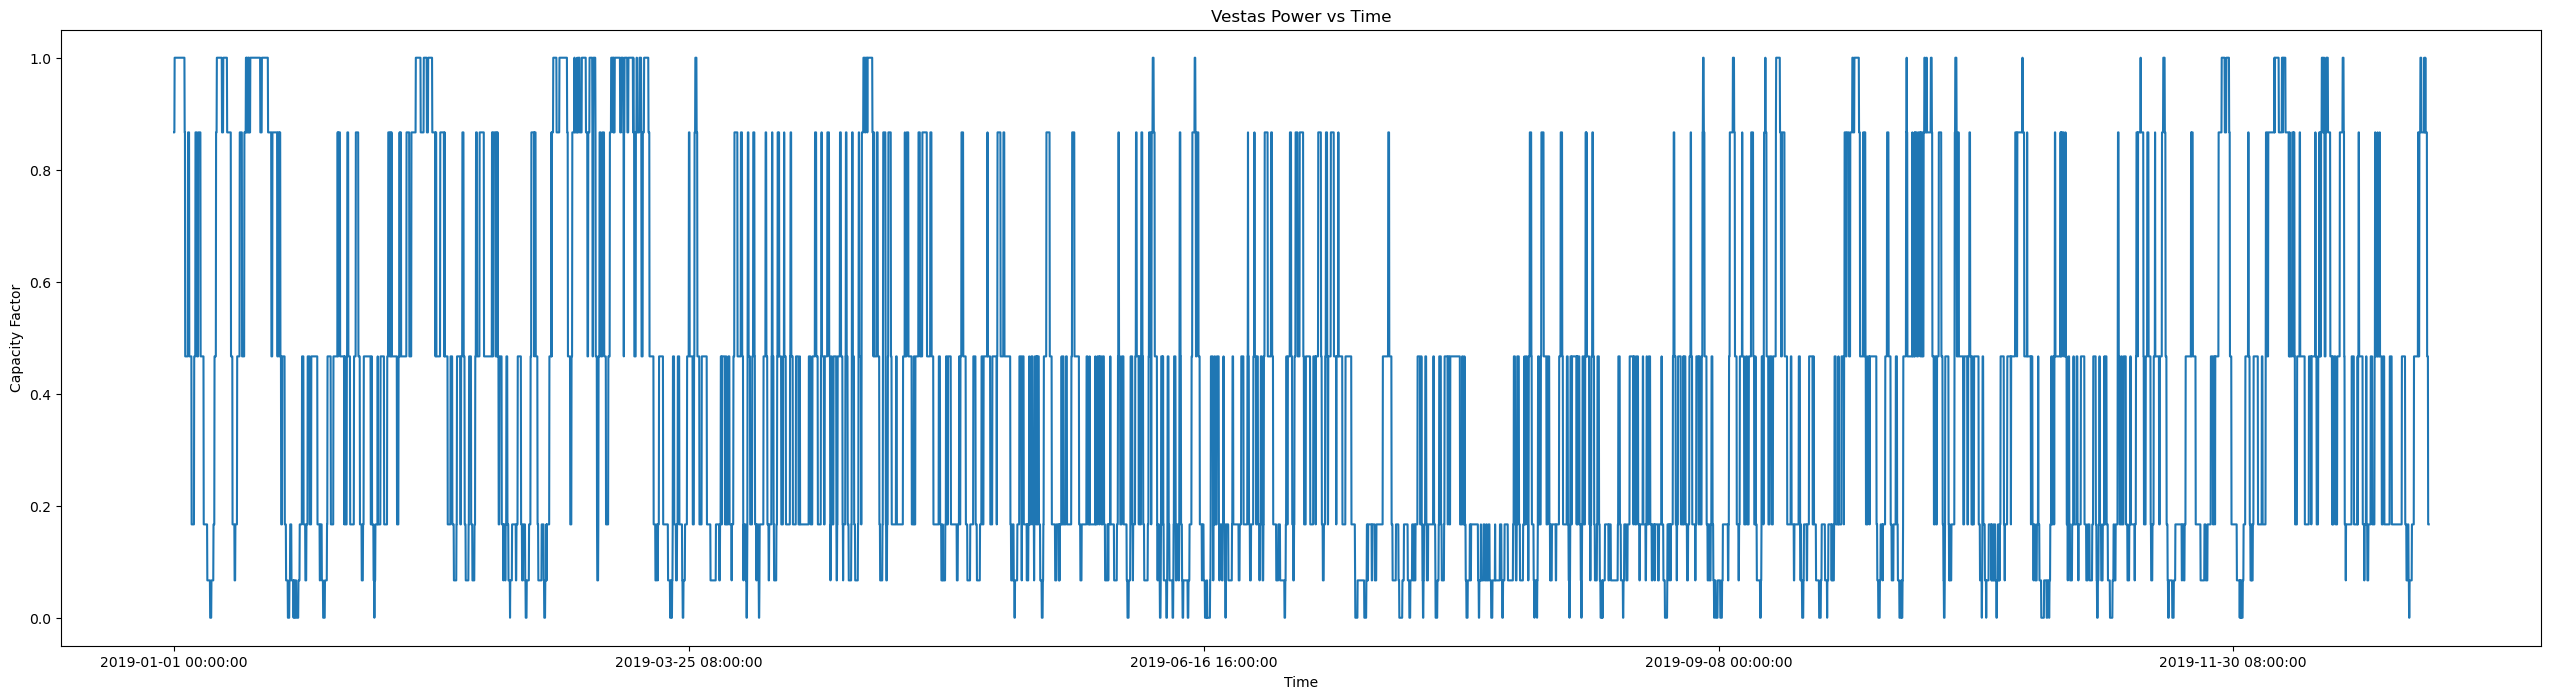

In [29]:
y = df.Vestas_normalised
ts = pd.Series(y, index=df.index)
ts.plot(figsize = (32,8))
plt.xlabel('Time')
plt.ylabel('Capacity Factor')
plt.title('Vestas Power vs Time')

### (m)

In [30]:
avg_wind_speed = round((sum(df.hub_wind_speed) / len(df.hub_wind_speed)),2)
print (avg_wind_speed, "m/s")

8.18 m/s


In [31]:
# Looking at above plots and data, approximately 3.2% of the time the wind turbine is not running due to low wind speeds.
# From looking at the data and plots, we can notice the turbine runs at maximum potential of only 6.4% of the time.
# It produces power at an average capacity factor of 0.39 and from the plot we can see the capacity factor of approx 0.4-0.5 being the most regular occurence.

# Currently the average hub wind speed is around 8m/s, if the hub height can be increased or the location can be changed to where the average
# hub wind speed is above 10m/s(2.6MW), that is when the Vestas turbine operates at close to its maximum capacity of 3 MW.